In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
diabetes = pd.read_csv("./pima-indians-diabetes data.csv")
airquality = pd.read_csv("./air-quality.csv")
college = pd.read_csv("./college.csv")
diabetes.dropna(subset=['BMI'], how='all', inplace=True)
diabetes.dropna(subset=['Glucose'], how='any', inplace=True)

In [50]:
# !pip install fancyimpute

In [51]:
# Import KNN from fancyimpute
from fancyimpute import KNN
from fancyimpute import IterativeImputer
from fancyimpute import SoftImpute
from fancyimpute import BiScaler
from fancyimpute import NuclearNormMinimization
from fancyimpute import MatrixFactorization
from fancyimpute import IterativeSVD
from fancyimpute import SimpleFill
from fancyimpute import MICE

# Copy diabetes to diabetes_knn_imputed
diabetes_knn_imputed = diabetes.copy(deep=True)

# Initialize KNN
knn_imputer = KNN()

# Impute using fit_tranform on diabetes_knn_imputed
diabetes_knn_imputed.iloc[:, :] = knn_imputer.fit_transform(diabetes_knn_imputed)

Imputing row 1/752 with 1 missing, elapsed time: 0.170
Imputing row 101/752 with 0 missing, elapsed time: 0.170
Imputing row 201/752 with 2 missing, elapsed time: 0.170
Imputing row 301/752 with 0 missing, elapsed time: 0.178
Imputing row 401/752 with 1 missing, elapsed time: 0.178
Imputing row 501/752 with 2 missing, elapsed time: 0.186
Imputing row 601/752 with 0 missing, elapsed time: 0.186
Imputing row 701/752 with 0 missing, elapsed time: 0.193


In [52]:
# Import IterativeImputer from fancyimpute
from fancyimpute import IterativeImputer

# Copy diabetes to diabetes_mice_imputed
diabetes_mice_imputed = diabetes.copy(deep=True)

# Initialize IterativeImputer
mice_imputer = IterativeImputer()

# Impute using fit_tranform on diabetes
diabetes_mice_imputed.iloc[:, :] = mice_imputer.fit_transform(diabetes)

In [53]:
from sklearn.preprocessing import OrdinalEncoder

users = pd.read_csv('./userprofile.csv')
# Set col_name to 'ambience'
col_name = 'ambience'
# Create Ordinal encoder
ambience_ord_enc = OrdinalEncoder()

# Select non-null values of ambience column in users
ambience = users[col_name]
ambience_not_null = ambience[ambience.notnull()]

# Reshape ambience_not_null to shape (-1, 1)
reshaped_vals = ambience_not_null.values.reshape(-1, 1)

# Select the non-null values for the column col_name in users and store the encoded values
encoded_vals = ambience_ord_enc.fit_transform(reshaped_vals)
users.loc[ambience.notnull(), col_name] = np.squeeze(encoded_vals)

In [54]:
# Create an empty dictionary ordinal_enc_dict
ordinal_enc_dict = {}

for col_name in users:
    # Create Ordinal encoder for col
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = users[col_name]
    
    # Select non-null values of col
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Store the values to non-null values of the column in users
    users.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [55]:
users

,smoker,drink_level,dress_preference,ambience,hijos,activity,budget
0,0.0,0.0,2.0,0.0,1.0,1.0,2.0
1,0.0,0.0,2.0,0.0,1.0,1.0,1.0
2,0.0,2.0,1.0,0.0,1.0,1.0,1.0
3,0.0,0.0,2.0,0.0,1.0,0.0,2.0
4,0.0,0.0,3.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...
133,0.0,1.0,3.0,0.0,1.0,1.0,2.0
134,0.0,1.0,2.0,0.0,2.0,1.0,1.0
135,1.0,2.0,3.0,1.0,1.0,1.0,1.0
136,0.0,2.0,1.0,0.0,1.0,1.0,1.0


In [56]:
ordinal_enc_dict

{'smoker': OrdinalEncoder(),
 'drink_level': OrdinalEncoder(),
 'dress_preference': OrdinalEncoder(),
 'ambience': OrdinalEncoder(),
 'hijos': OrdinalEncoder(),
 'activity': OrdinalEncoder(),
 'budget': OrdinalEncoder()}

In [78]:
users_KNN_imputed = pd.read_csv('./userprofile.csv')
users_KNN_imputed.describe()

,smoker,drink_level,dress_preference,ambience,hijos,activity,budget
count,135,138,133,132,127,131,131
unique,2,3,4,3,3,4,3
top,False,abstemious,no preference,family,independent,student,medium
freq,109,51,53,70,113,113,91


In [59]:
# Create KNN imputer
KNN_imputer = KNN()

# Impute 'users' DataFrame. It is rounded to get integer values
users_KNN_imputed.iloc[:, :] = np.round(KNN_imputer.fit_transform(users))
print(users_KNN_imputed.columns,users_KNN_imputed.shape)
print(users.columns,users.shape)
# Loop over the column names in 'users'
for col_name in users:
    
    # Reshape the column data
    reshaped = users_KNN_imputed[col_name].values.reshape(-1, 1)
    print(reshaped.shape)
    # Select the column's Encoder and perform inverse transform on 'reshaped'
    users_KNN_imputed[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)

print(users_KNN_imputed.columns,users_KNN_imputed.shape)
print(users.columns,users.shape)

Imputing row 1/138 with 0 missing, elapsed time: 0.006
Imputing row 101/138 with 0 missing, elapsed time: 0.006
Index(['smoker', 'drink_level', 'dress_preference', 'ambience', 'hijos',
       'activity', 'budget'],
      dtype='object') (138, 7)
Index(['smoker', 'drink_level', 'dress_preference', 'ambience', 'hijos',
       'activity', 'budget'],
      dtype='object') (138, 7)
(138, 1)


ValueError: 2

In [18]:
# # Create KNN imputer
# KNN_imputer = KNN()

# # Impute 'users' DataFrame. It is rounded to get integer values
# users_KNN_imputed.iloc[:, :] = np.round(KNN_imputer.fit_transform(users))

# # Loop over the column names in 'users'
# for col_name in users.columns:
    
#     # Reshape the column data
#     reshaped = users_KNN_imputed[col_name].values.reshape(-1, 1)
    
#     # Select the column's Encoder and perform inverse transform on 'reshaped'
#     users_KNN_imputed[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)

Imputing row 1/138 with 0 missing, elapsed time: 0.007
Imputing row 101/138 with 0 missing, elapsed time: 0.008


ValueError: 2

In [62]:
# !pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB 163.8 kB/s eta 0:00:56
     ---------------------------------------- 0.0/9.2 MB 163.8 kB/s eta 0:00:56
     ---------------------------------------- 0.0/9.2 MB 163.8 kB/s eta 0:00:56
     ---------------------------------------- 0.0/9.2 MB 163.8 kB/s eta 0:00:56
     ---------------------------------------- 0.0/9.2 MB 163.8 kB/s eta 0:00:56
     ---------------------------------------- 0.0/9.2 MB 163.8 kB/s eta 0:00:56
     ---------------------------------------- 0.0/9.2 MB 163.8 kB/s eta 0:00:56
     ---------------------------------------- 0.0/9.2 MB 163.8 kB/s eta 0:00:56
     ---------------------------------------- 0.1/9.2 MB 109.2 kB/s eta 0:01

DEPRECATION: Loading egg at c:\users\jdamodhar\appdata\local\programs\python\python311\lib\site-packages\sdgp-0.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [65]:
diabetes_cc = diabetes.dropna(how = 'any')
import statsmodels.api as sm  
# Add constant to X and set X & y values to fit linear model
X = sm.add_constant(diabetes_cc.iloc[:, :-1])
y = diabetes_cc['Class']
lm = sm.OLS(y, X).fit()

# Print summary of lm
print('\nSummary: ', lm.summary())

# Print R squared score of lm
print('\nAdjusted R-squared score: ', lm.rsquared_adj)

# Print the params of lm
print('\nCoefficcients:\n', lm.params)


Summary:                              OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     25.30
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           2.65e-31
Time:                        20:50:11   Log-Likelihood:                -177.76
No. Observations:                 392   AIC:                             373.5
Df Residuals:                     383   BIC:                             409.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.102

In [67]:
# # 
#                     Mean Imputation  KNN Imputation  MICE Imputation
#     Adj. R-squared            0.314           0.317            0.318

0.33210805003287625

In [74]:
rsquared_df = {'Mean Imputation': lm.rsquared_adj, 
             'KNN Imputation': lm.rsquared_adj, 
             'MICE Imputation': lm.rsquared_adj}

# Find the maximum Adjusted R-squared score
best_imputation = max(rsquared_df, key=rsquared_df.get)

print("The best imputation technique is: ", best_imputation)

The best imputation technique is:  Mean Imputation


In [ ]:
rsquared_df = {'Mean Imputation': lm_mean.rsquared_adj, 
             'KNN Imputation': lm_KNN.rsquared_adj, 
             'MICE Imputation': lm_MICE.rsquared_adj}

# Find the maximum Adjusted R-squared score
best_imputation = max(rsquared_df, key=rsquared_df.get)

print("The best imputation technique is: ", best_imputation)

In [71]:
# Copy diabetes dataset to diabetes_mean_imputed
diabetes_mean_imputed = diabetes.copy(deep=True)
from sklearn.impute import SimpleImputer
# Initialize MeanImputer
mean_imputer = SimpleImputer(strategy='mean')

# Impute using fit_transform on diabetes_mean_imputed
diabetes_mean_imputed.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean_imputed)

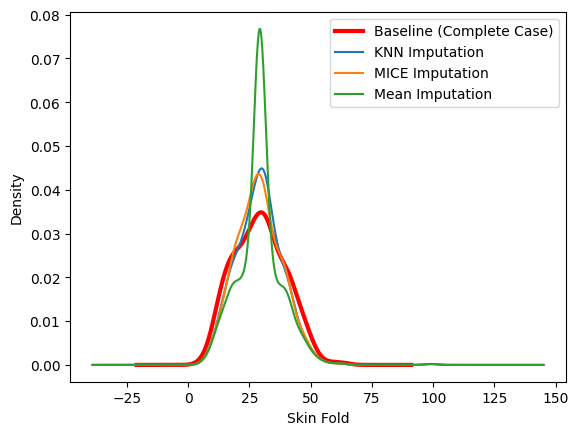

In [72]:
# Plot graphs of imputed DataFrames and the complete case
diabetes_cc['Skin_Fold'].plot(kind='kde', c='red', linewidth=3)
diabetes_knn_imputed['Skin_Fold'].plot(kind='kde')
diabetes_mice_imputed['Skin_Fold'].plot(kind='kde')
diabetes_mean_imputed['Skin_Fold'].plot(kind='kde')

# Create labels for the four DataFrames
labels = ['Baseline (Complete Case)', 'KNN Imputation', 'MICE Imputation', 'Mean Imputation']
plt.legend(labels)

# Set the x-label as Skin Fold
plt.xlabel('Skin Fold')

plt.show()